# Part II - (Ford Gobike Data Presentation)
## by (Rawan Alsaedi)





## Investigation Overview


In this investigation, I wanted to look at the different factors affecting the number of bike trips and the duration of trips, such as: Gender - age - user type - days of week.


## Dataset Overview

The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area and containing the trip data of the ford gobike about 183,412 with 16 features.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_ford=pd.read_csv('Ford_Gobike_Data_Exploration.csv', index_col=0)

In [3]:
df_ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_min,duration_hours,weekday_st,day_st,hour_st,hour_et
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,38,869,14,Thursday,28,17,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,50,1030,17,Thursday,28,12,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,33,608,10,Thursday,28,17,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,48,26,0,Thursday,28,23,0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,312.0,San Jose Diridon Station,3803,Subscriber,1983.0,Female,No,39,19,0,Thursday,28,23,0


### Percentage Bike Rides Users per Gender

Male took around 74% of all bike rides, female took around %24 and other took around %2 of them.



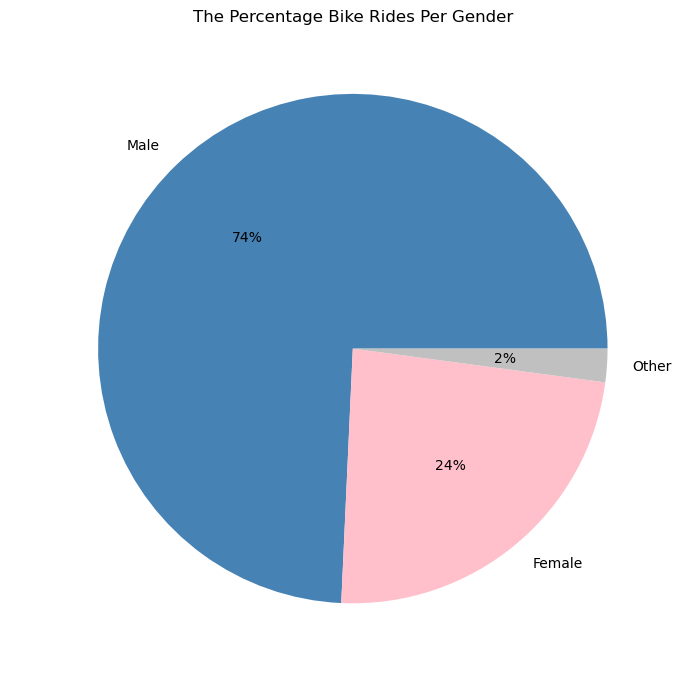

In [4]:
gender_counts = df_ford['member_gender'].value_counts()
colors = ['steelblue', 'pink', 'silver']
def pie_gender_counts():
    plt.figure(figsize=[14.70, 8.27])
    plt.tight_layout()
    gender_counts.plot(
    kind='pie',ylabel=" " ,title="The Percentage Bike Rides Per Gender",
  autopct='%1.0f%%', colors=colors);
pie_gender_counts()


### Distribution of Trip Durations per Users Type , Gender and Weekday

In the trip durations,the subscriber people are very high but they took lower trip duration than customer. Males took average trip duration about 11 min while the female took around 12 minutes. The most trip durations over weekday took between 11 and 13 minutes.

In [5]:
df_ford['weekday_st'] = pd.Categorical(df_ford['weekday_st'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

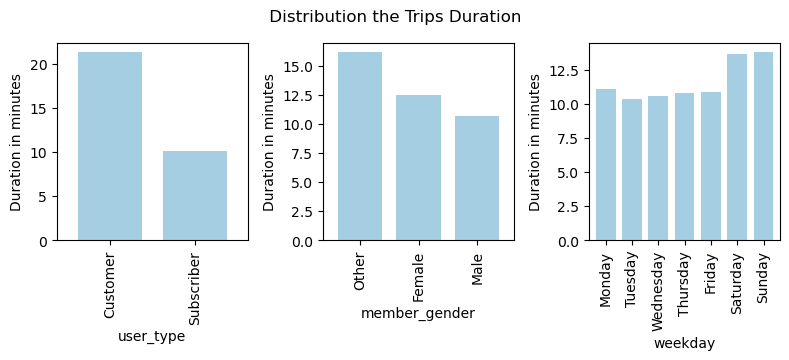

In [6]:
# plot subplot bars to show average trips duration per users type , gender and weekday
fig = plt.figure(figsize=[14.70, 8.27])
plt.subplot(2, 3, 1)
df_ford.groupby('user_type')['duration_min'].mean().sort_values(ascending=False).plot(kind='bar',ylabel="Duration in minutes",xlabel="user_type",  # Plot a bar chart
            legend=False,                       
            width=0.75,      
            figsize=(8,5.8),  
            colormap='Paired')
plt.tight_layout();
plt.subplot(2, 3, 2)
df_ford.groupby('member_gender')['duration_min'].mean().sort_values(ascending=False).plot(kind='bar',ylabel="Duration in minutes",xlabel="member_gender",  # Plot a bar chart
            legend=False,                         
            width=0.75,     
            figsize=(8,5.8),  
            colormap='Paired')

plt.tight_layout();
plt.subplot(2, 3, 3)
plt.tight_layout();
df_ford.groupby('weekday_st')['duration_min'].mean().plot(kind='bar',ylabel="Duration in minutes",xlabel="weekday",  # Plot a bar chart
            legend=False,                           
            width=0.75,      
            figsize=(8,5.8),  
            colormap='Paired')

plt.suptitle(" Distribution the Trips Duration ")
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.tight_layout()

plt.show()


### Distribution of Bike Users Age over Weekday

Most bike users have ages between 20 to 60 over weekday and the average ages was about 35 in each days of week .



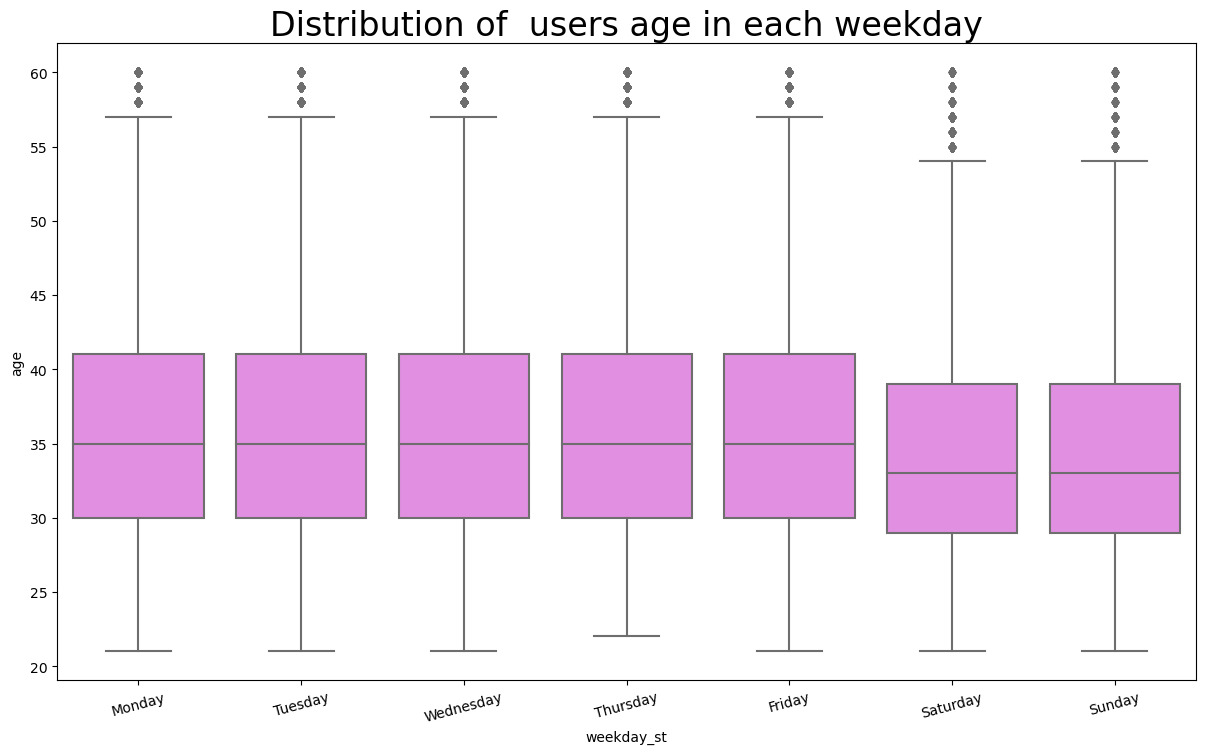

In [7]:
# plot boxplot to show distribution of ages per weekday
def plot_age_weekday(data,x,y , title):
    plt.figure(figsize=[14.70, 8.27])
    plt.tight_layout()
    sb.boxplot(data=data,x=x ,y=y , color ="violet")
    plt.xticks(rotation=15);
    plt.title(title , fontsize=24);
plot_age_weekday(data=df_ford, x='weekday_st', y='age', title="Distribution of  users age in each weekday") 

### Distribution of the relationship between users age & type and trips duration

The customer users have longer trip duration than subscriber users. Surprisingly, the younger customers had longer trip duration than older customers .

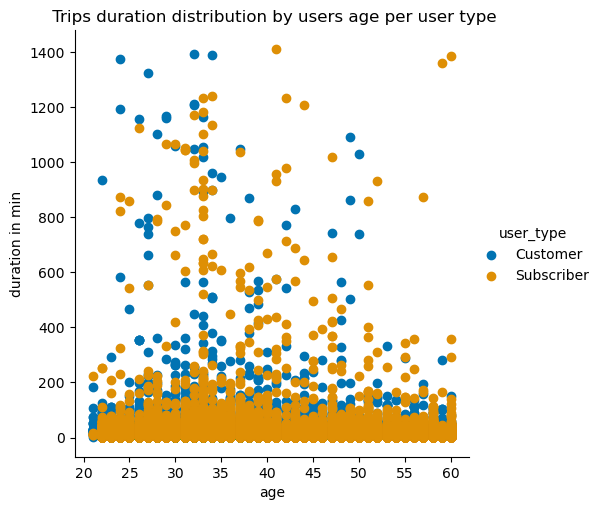

In [9]:
# plot scatter to show the relationship between  users age & type and  trips duration
g = sb.FacetGrid(data = df_ford, hue = 'user_type', size = 5,
                 palette = 'colorblind')
g.map(plt.scatter, 'age', 'duration_min')
g.add_legend()
plt.title(' Trips duration distribution by users age per user type', fontsize=12 )
plt.xlabel('age', fontsize=10)
plt.ylabel('duration in min', fontsize=10);


>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_Presentation_v.ipynb --to slides --post serve --no-input --no-prompt --ServePostProcessor.port=8885

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 